In [10]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# import matplotlib
# matplotlib.use('TkAgg')

# Load the model
CWD = os.getcwd()
yolo_m = YOLO(os.path.join(CWD, "runs/detect/train1/weights/best.pt"))

def load_files(ad:str) -> list[str]:
    valid_extensions = {"tiff", "tif", "png", "jpg", "jpeg", "bmp", "gif", "webp"}
    FileNames = [file for file in sorted(os.listdir(ad)) if file.split(".")[-1].lower() in valid_extensions]
    return sorted(FileNames)


Base_Root = os.path.normpath(os.path.join(CWD, '..', "testSet"))

In [11]:
file_list = load_files(Base_Root)
file_list = file_list[::5] # downsample for faster testing

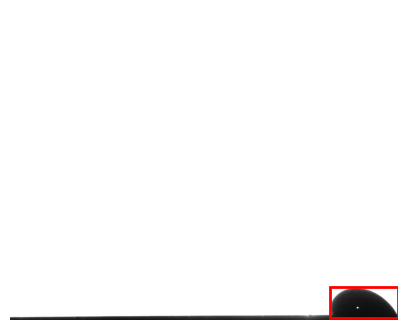

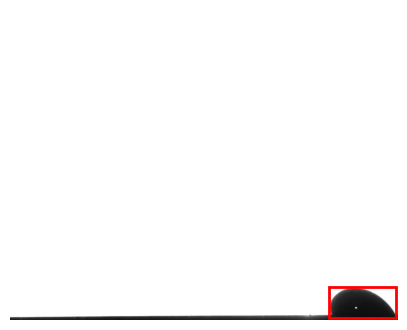

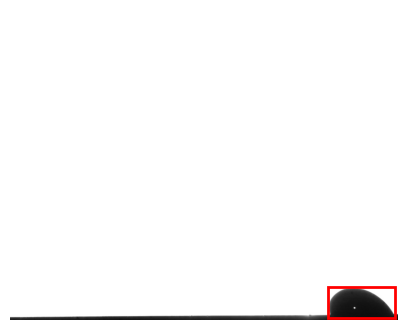

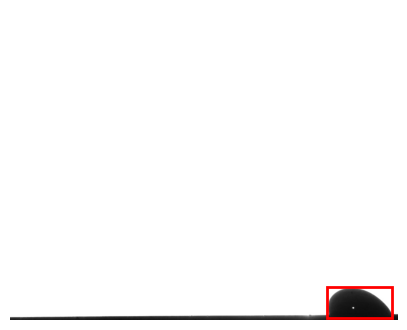

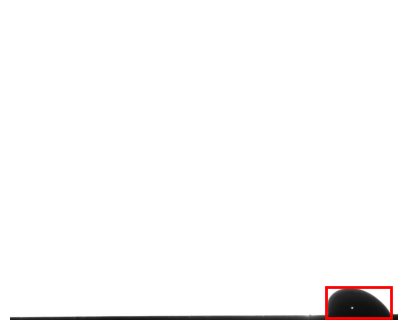

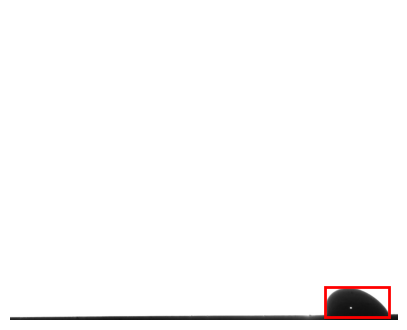

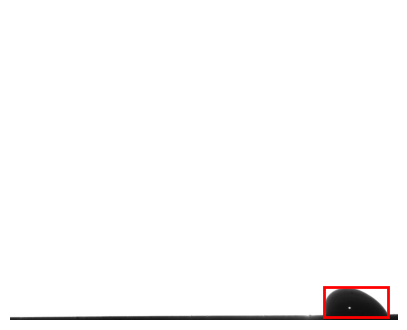

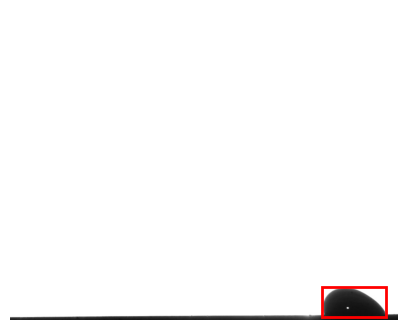

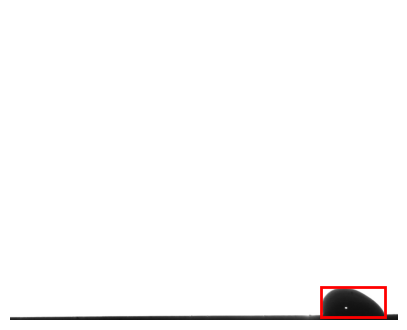

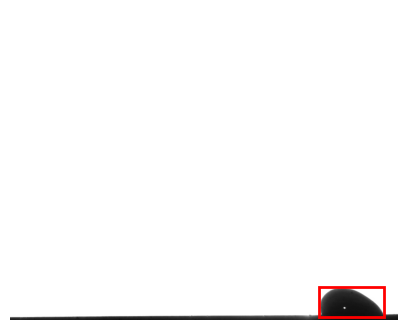

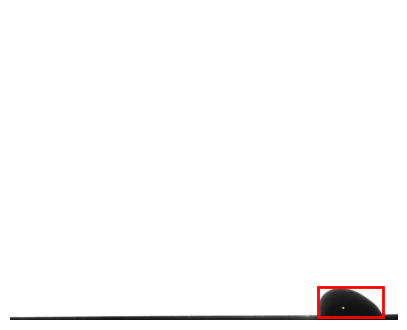

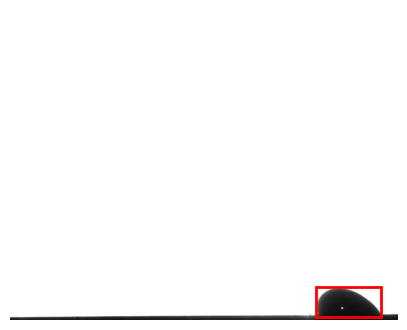

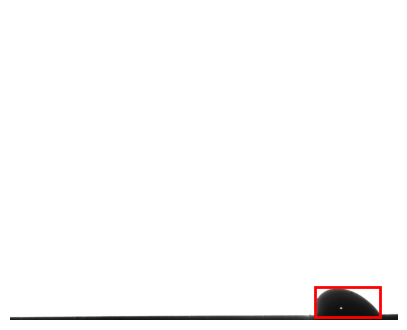

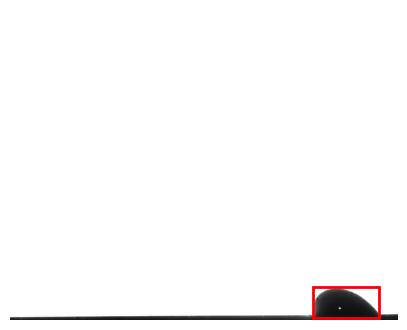

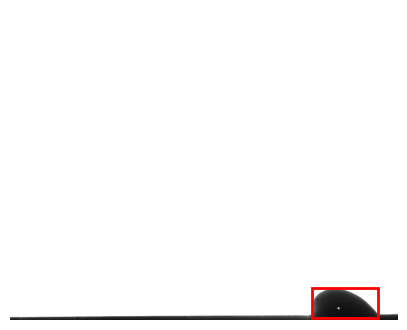

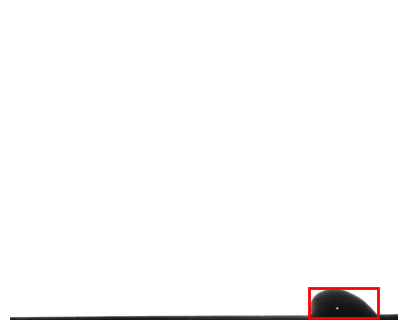

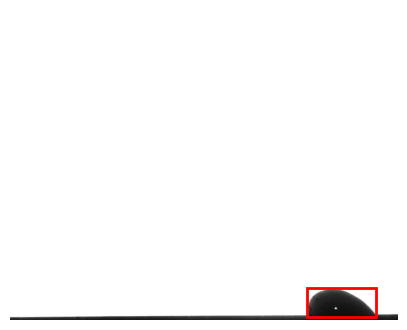

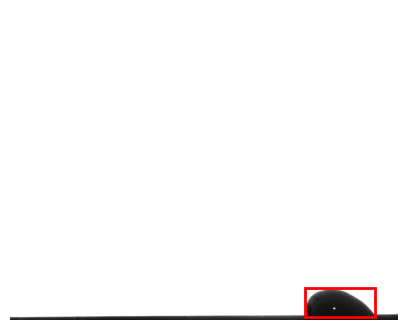

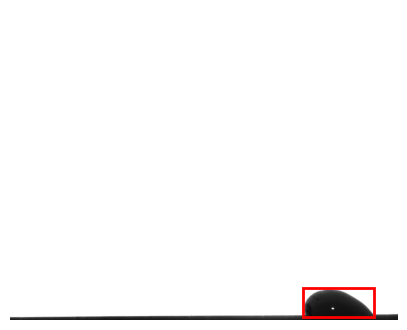

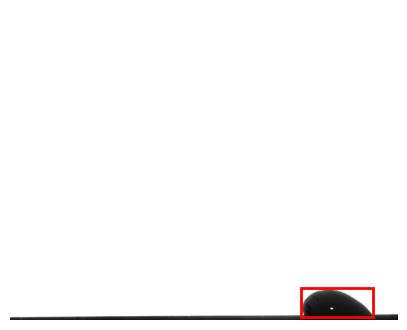

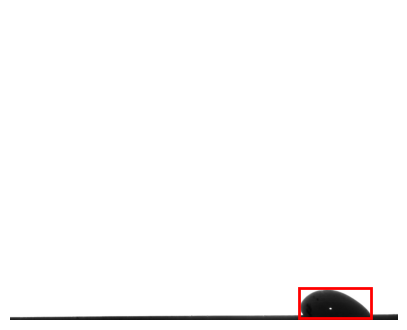

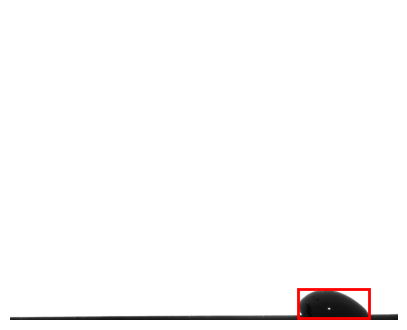

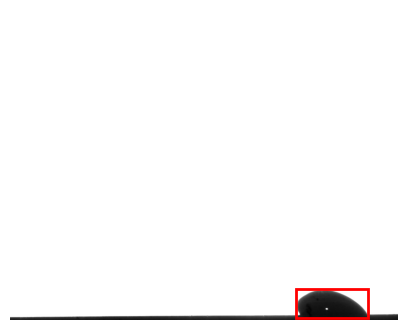

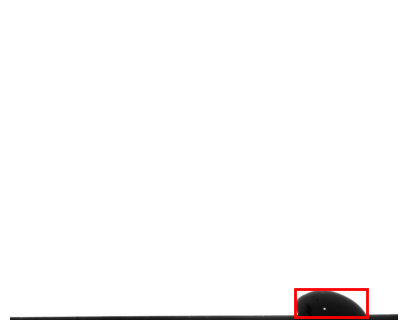

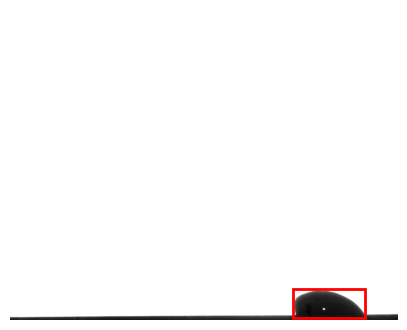

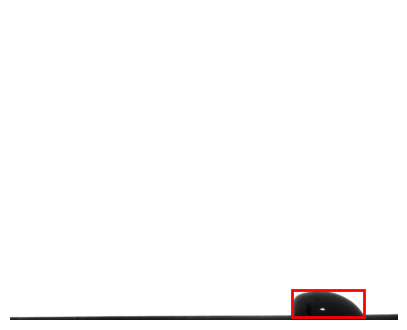

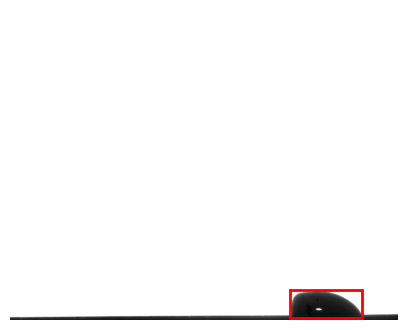

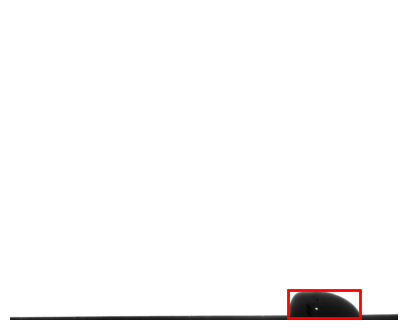

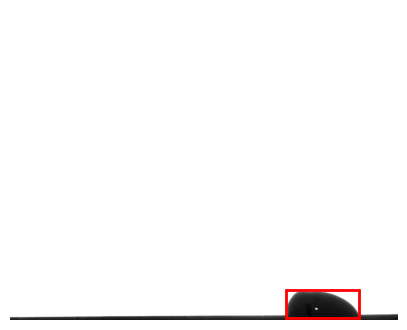

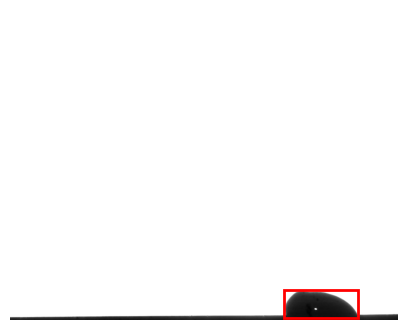

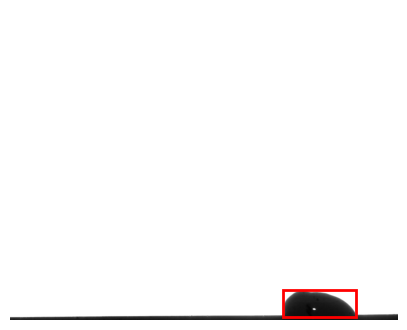

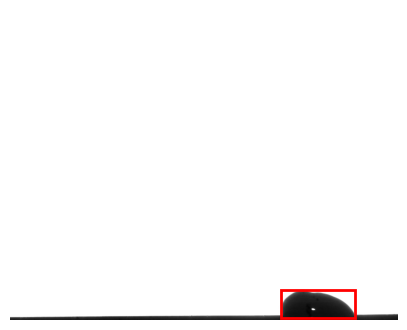

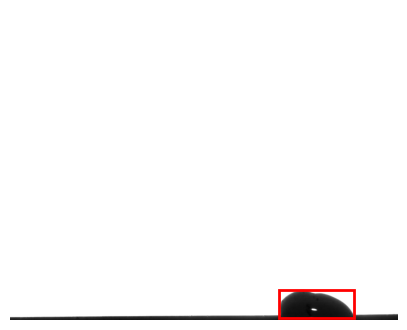

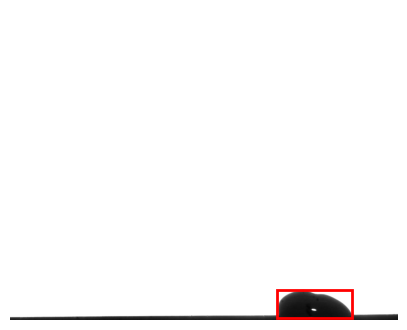

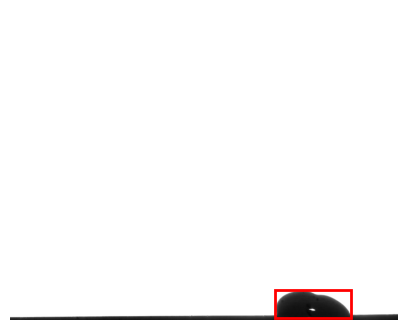

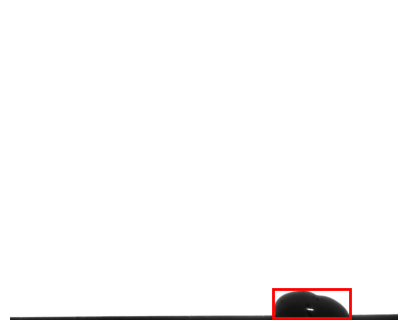

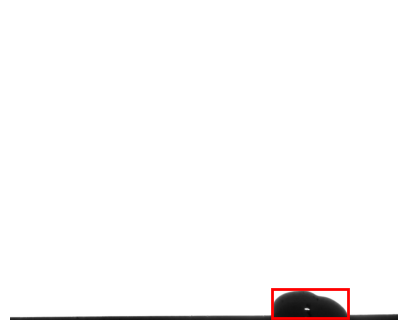

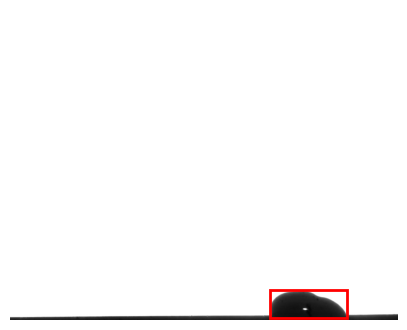

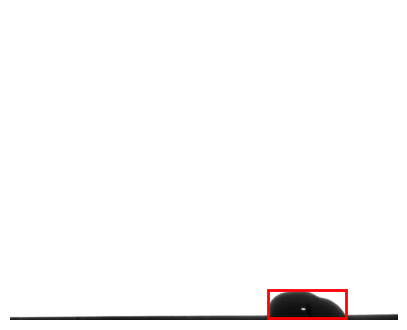

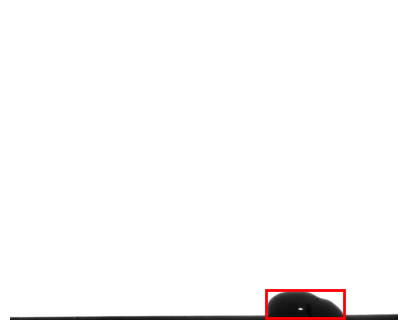

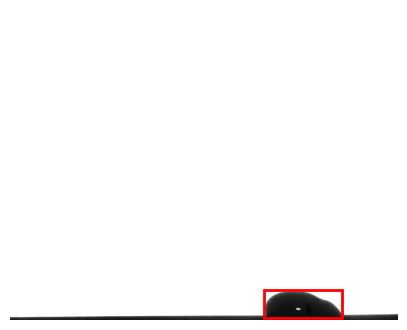

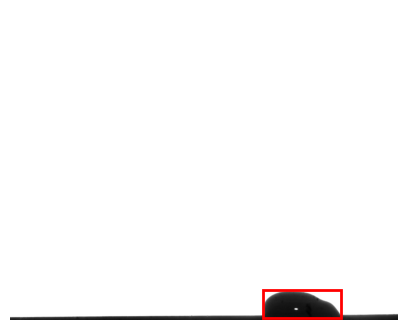

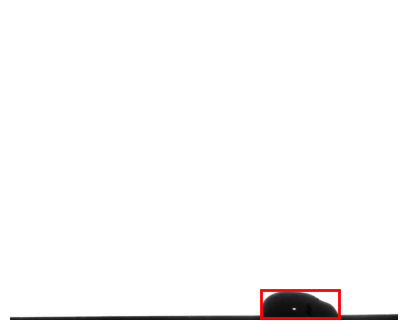

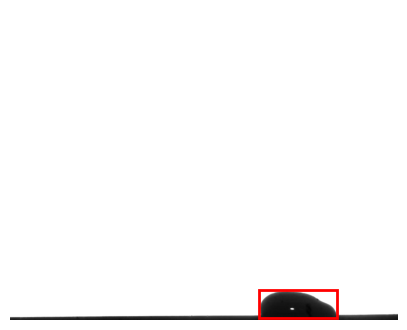

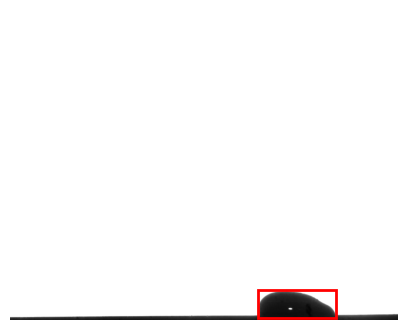

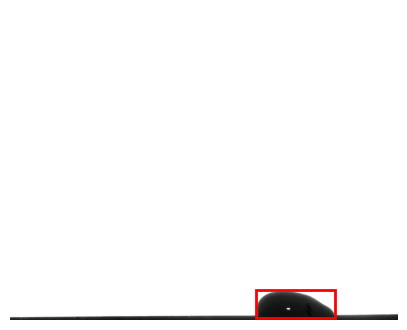

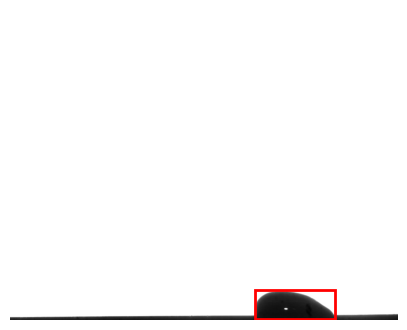

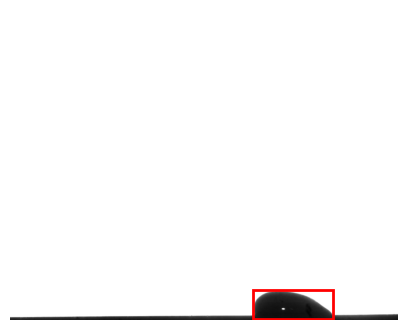

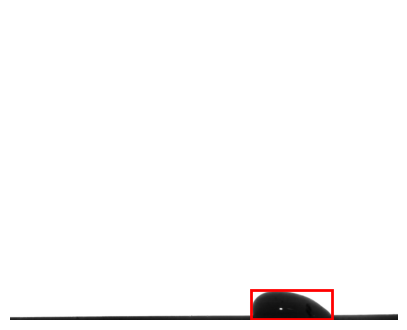

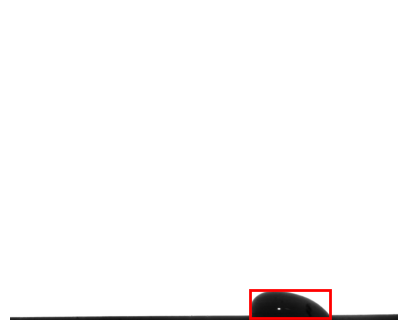

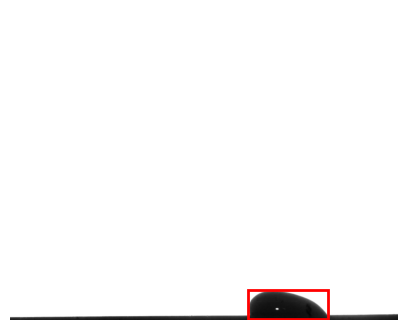

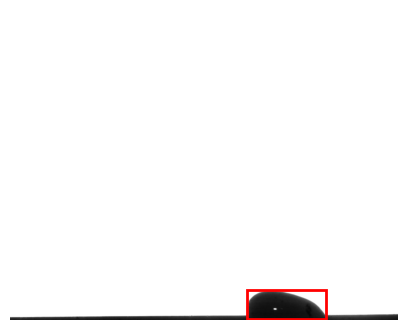

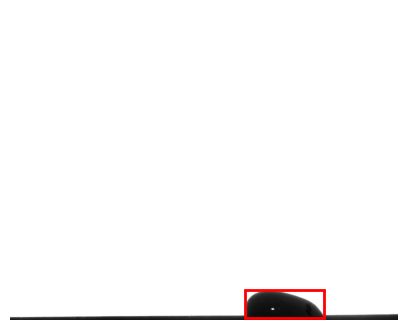

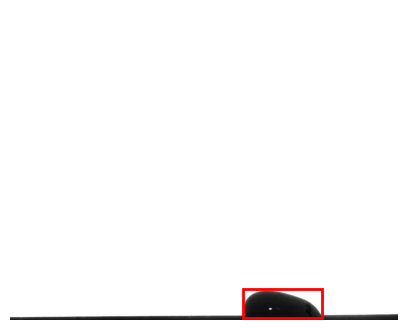

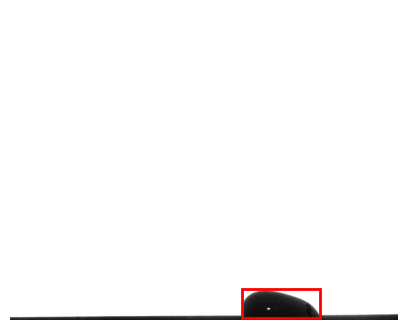

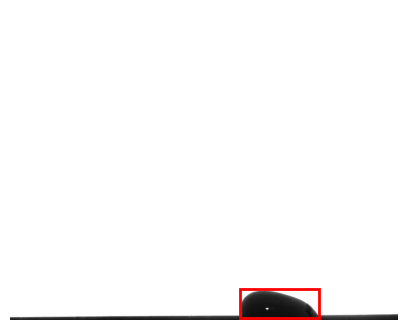

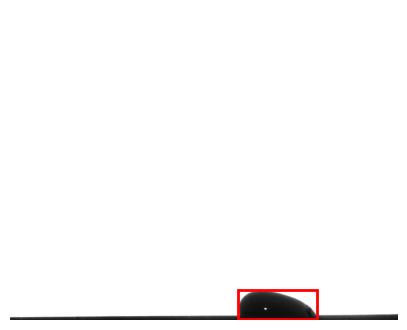

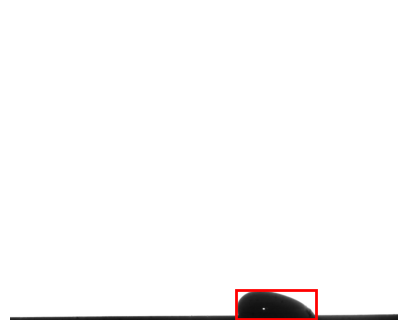

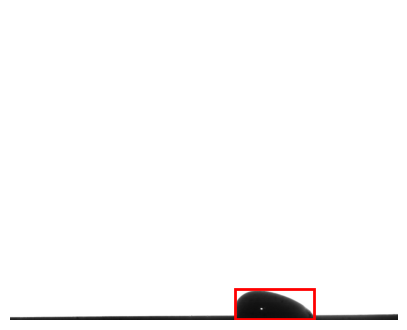

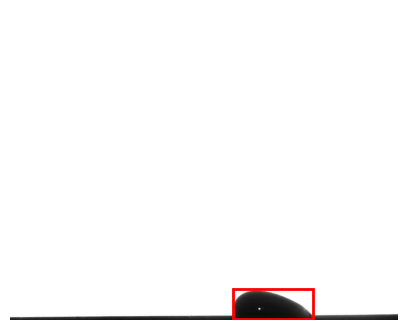

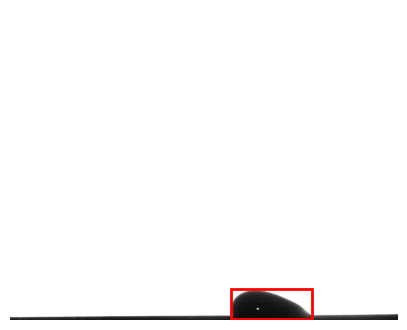

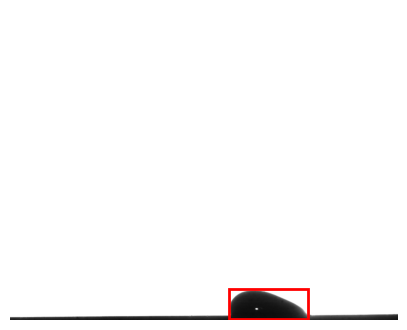

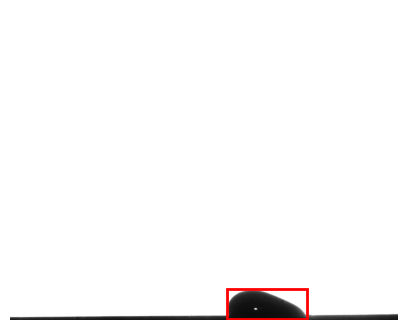

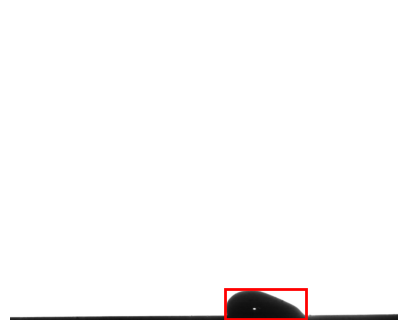

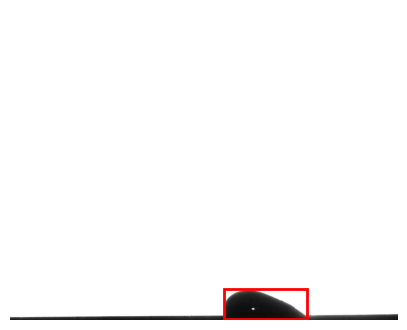

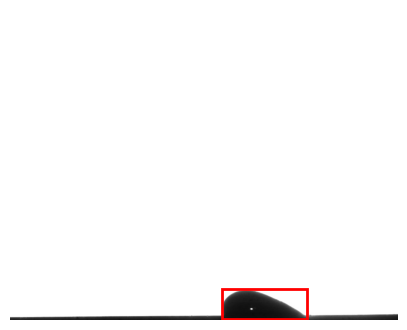

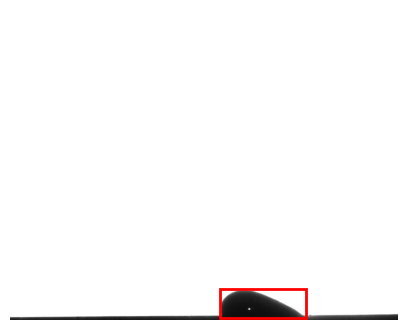

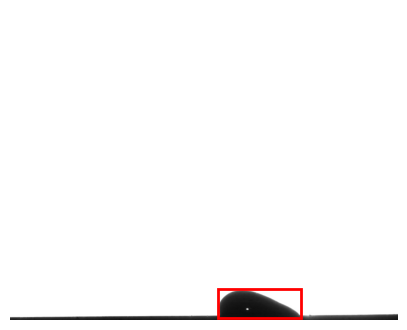

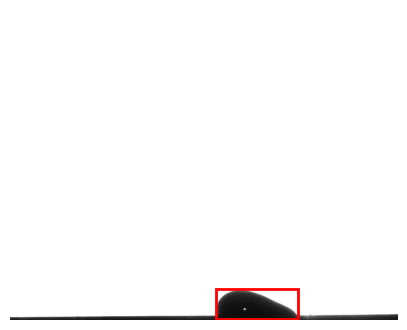

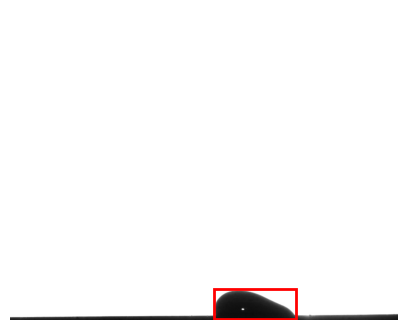

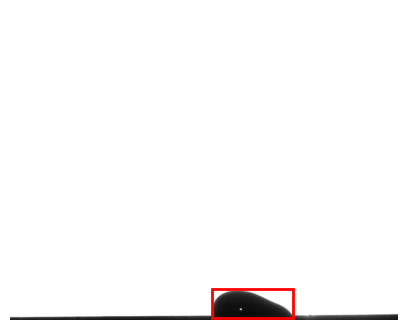

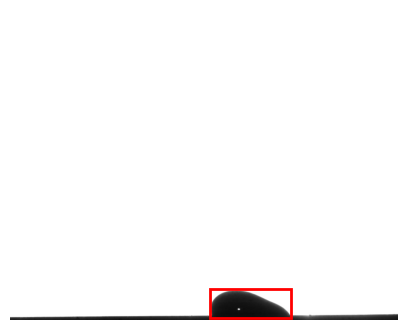

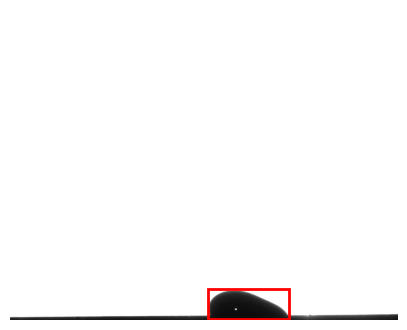

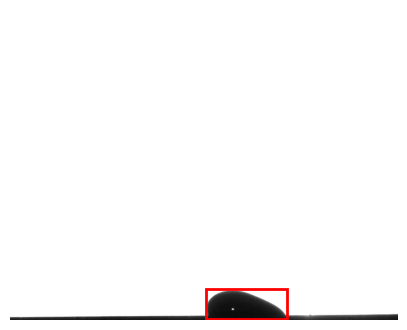

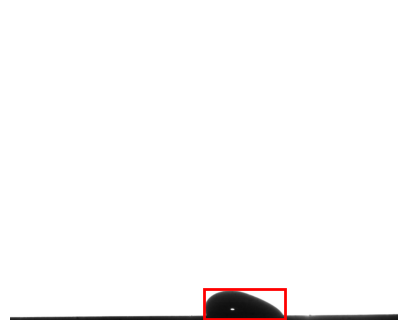

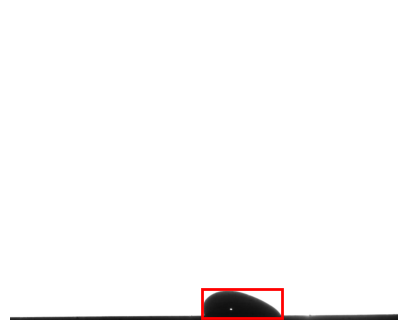

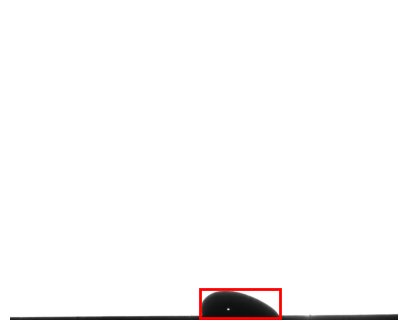

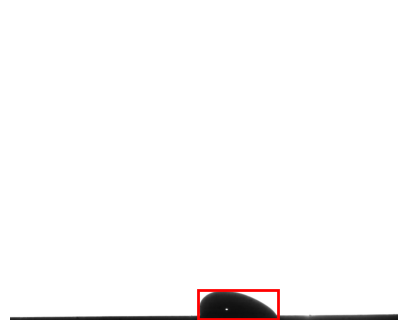

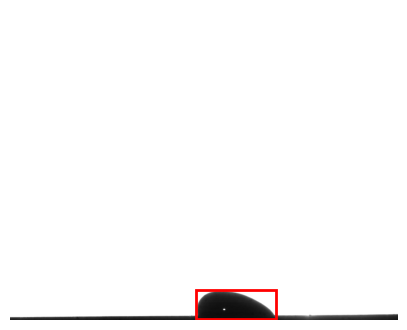

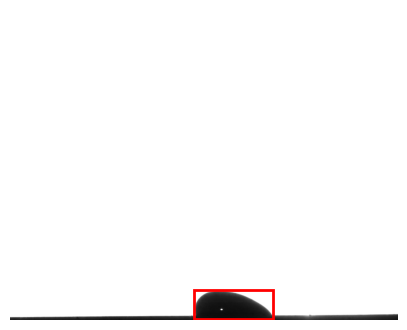

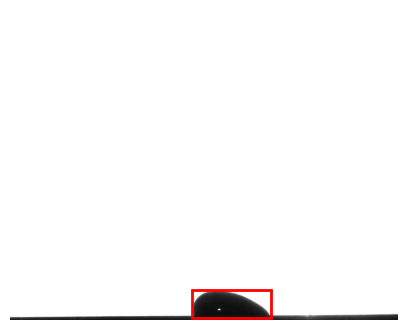

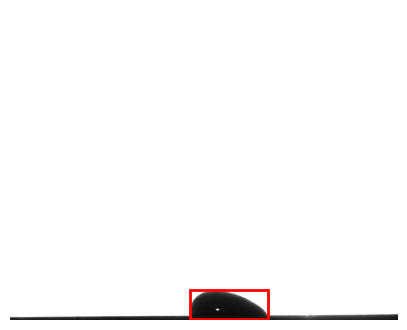

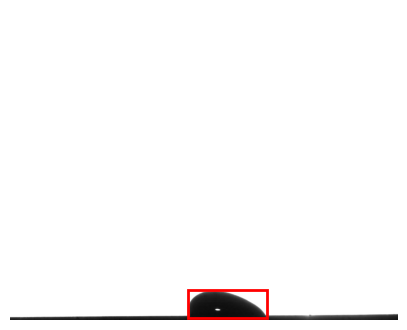

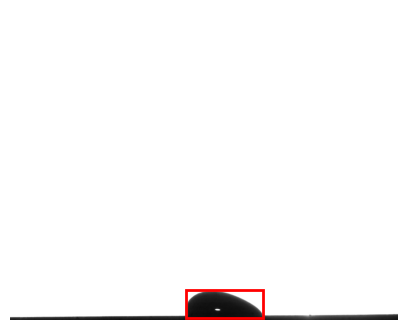

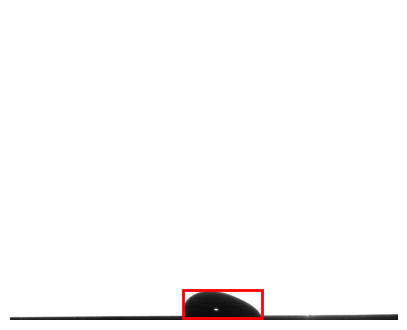

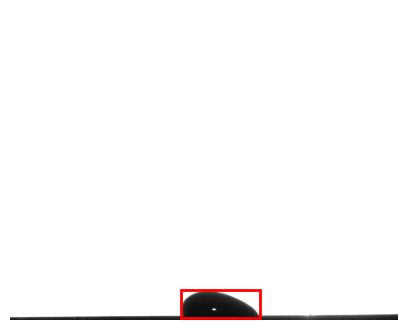

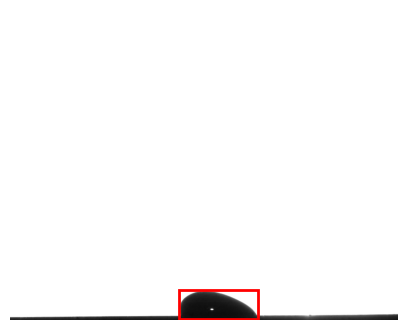

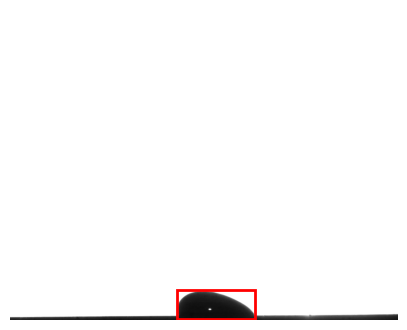

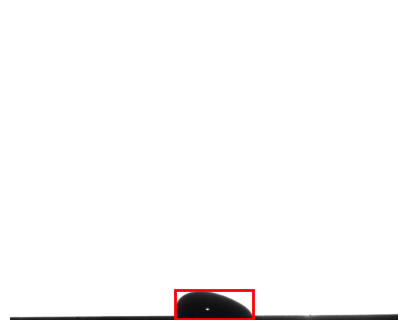

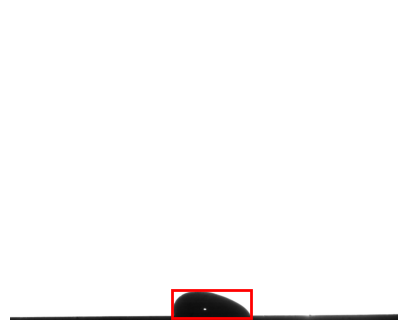

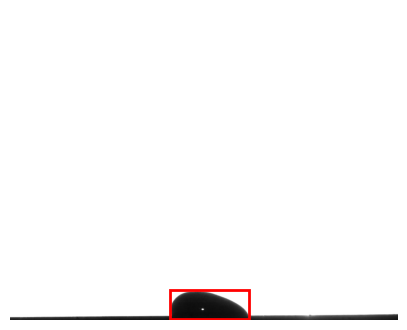

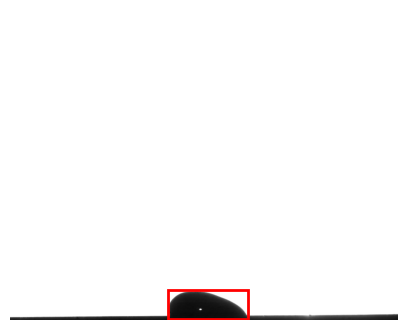

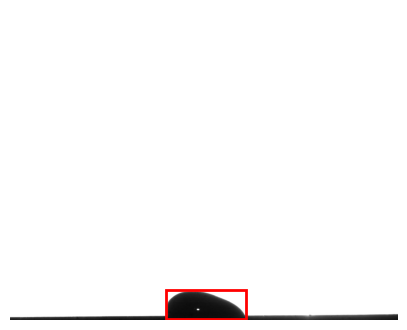

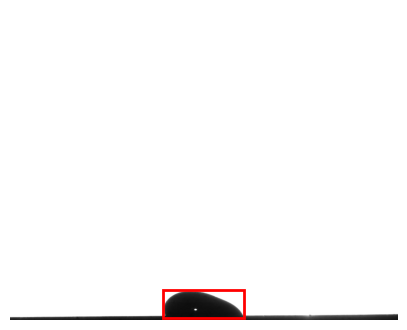

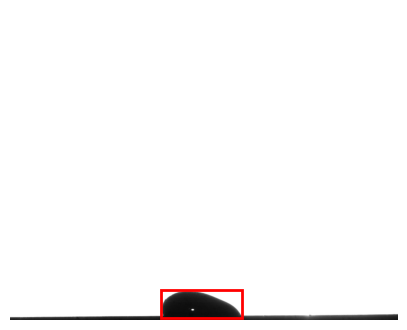

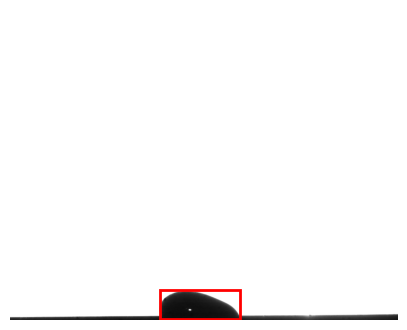

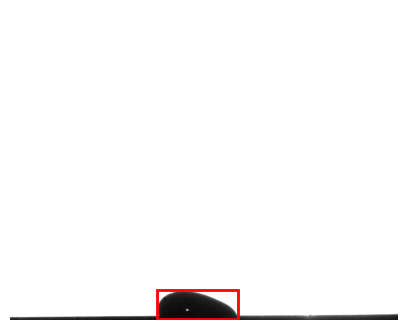

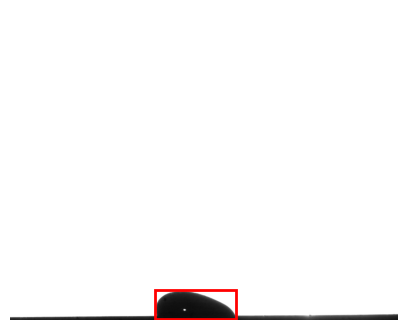

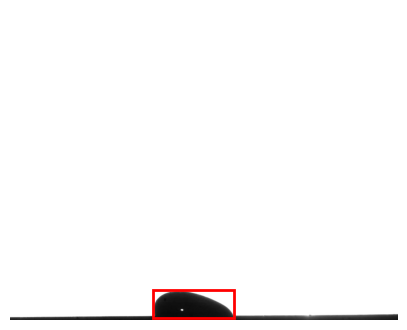

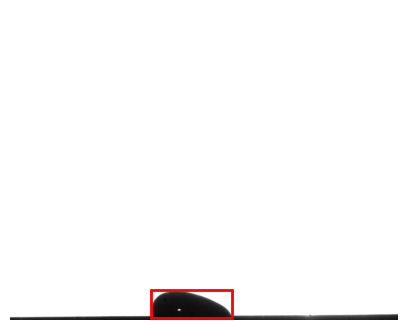

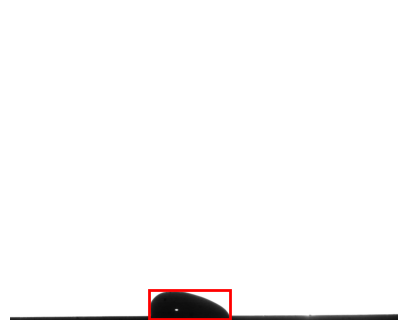

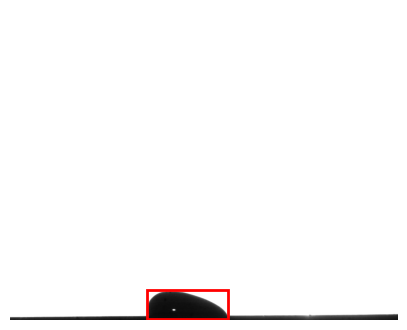

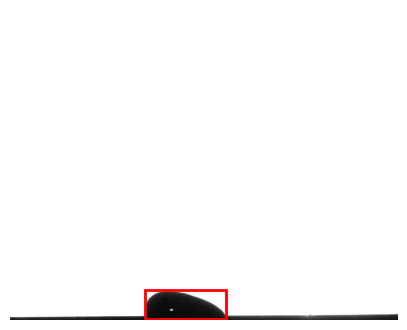

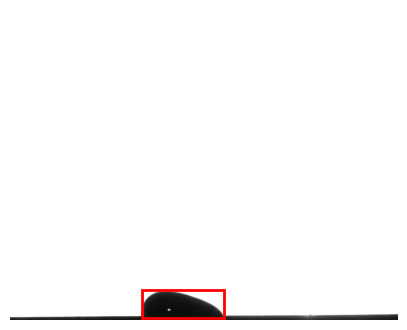

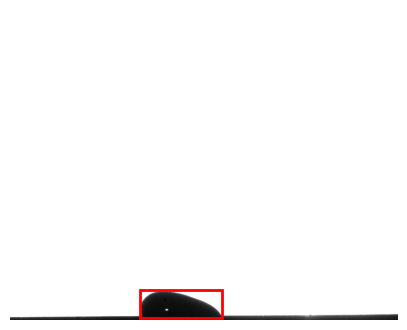

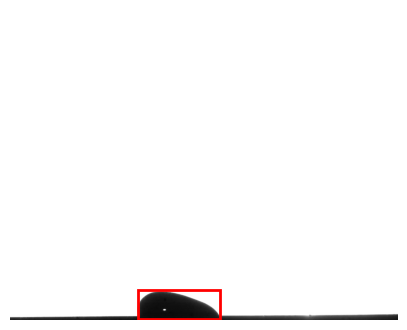

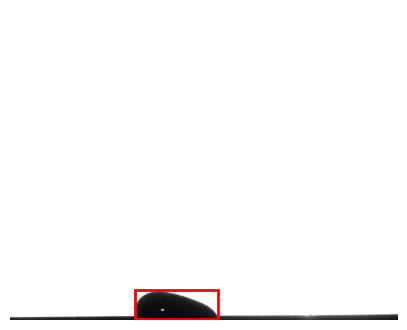

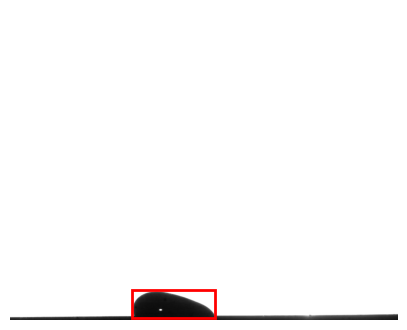

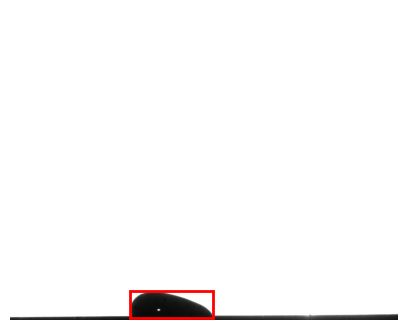

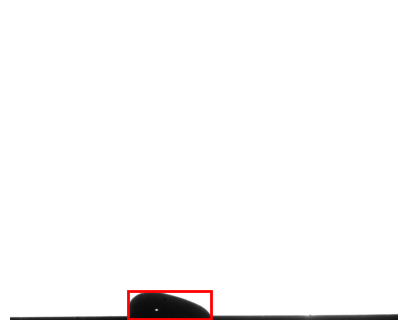

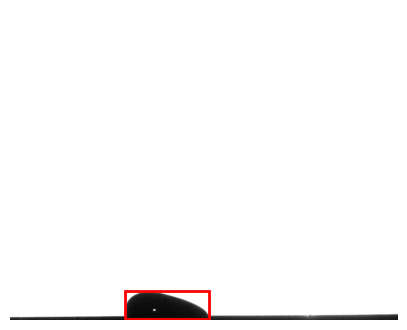

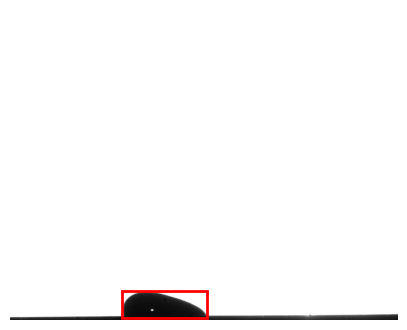

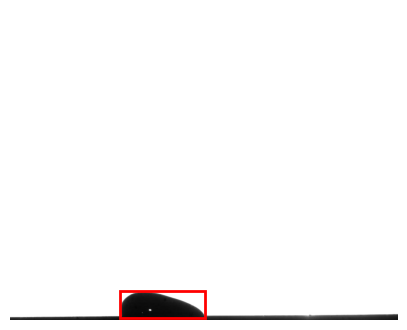

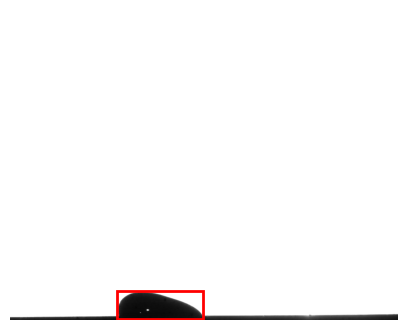

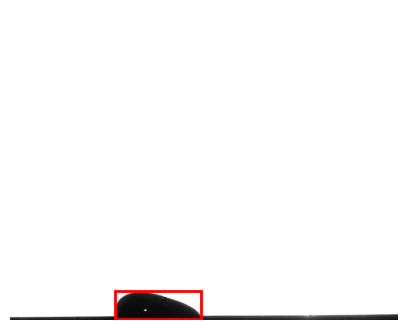

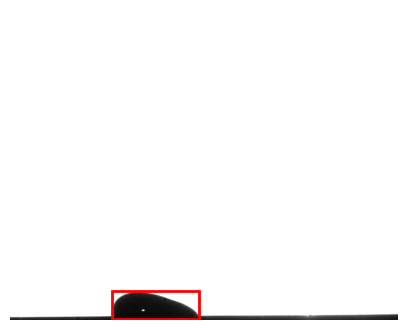

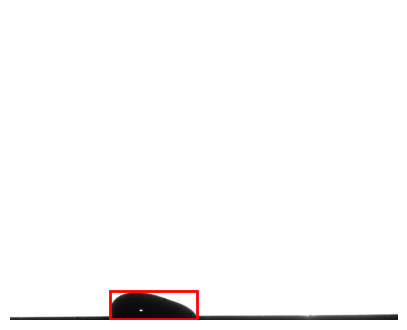

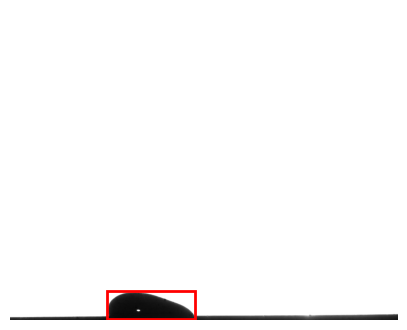

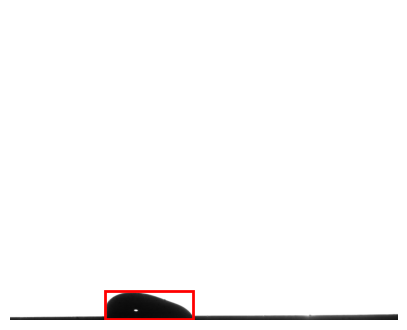

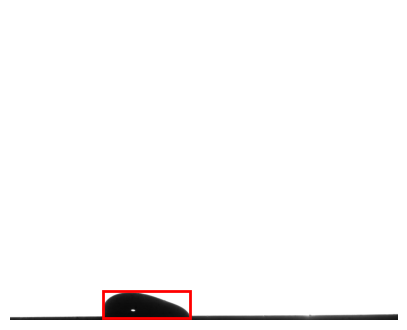

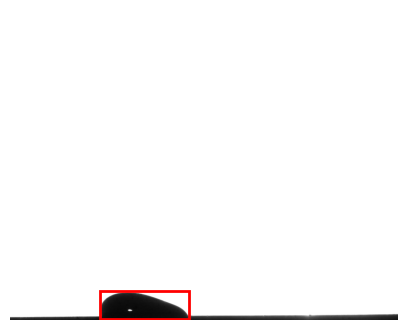

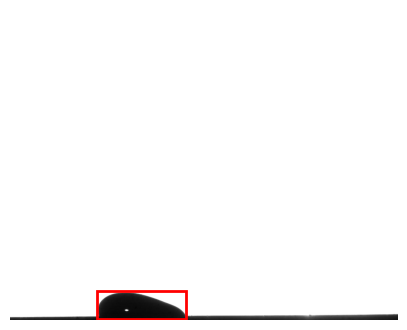

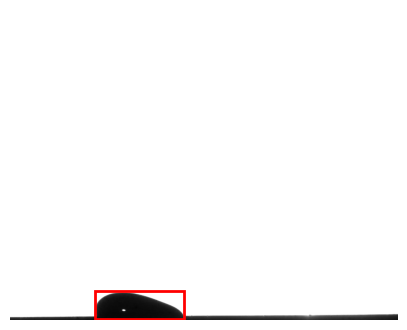

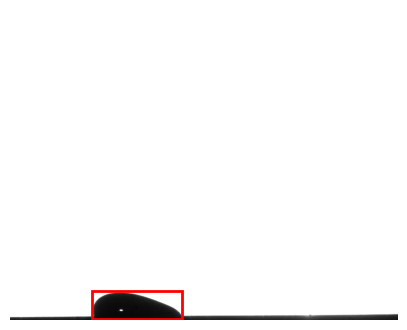

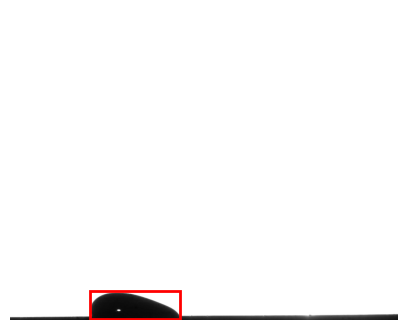

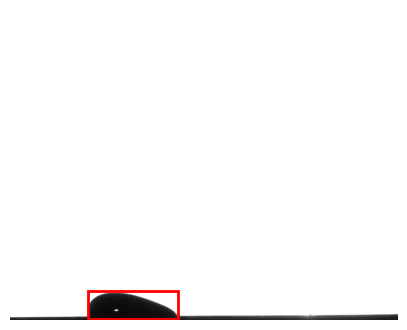

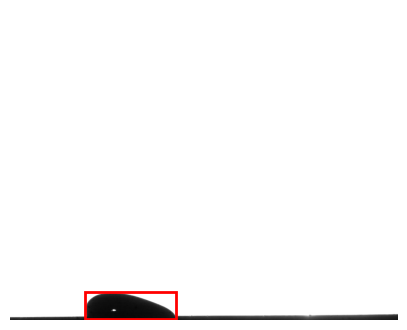

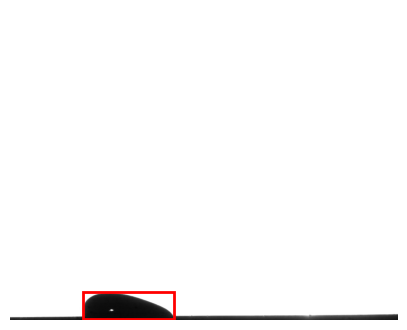

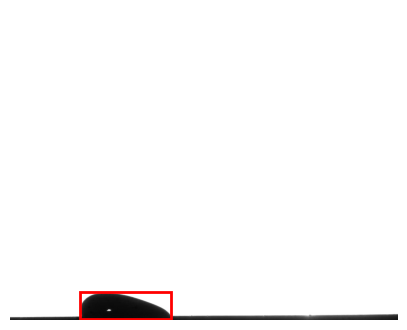

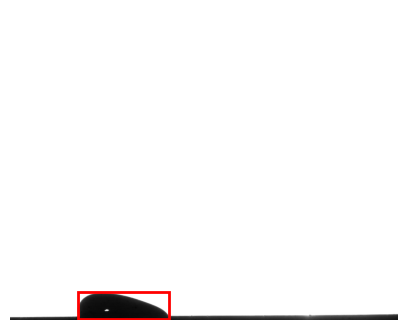

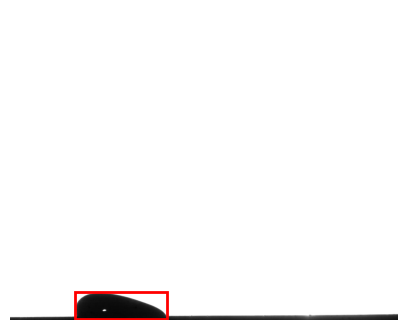

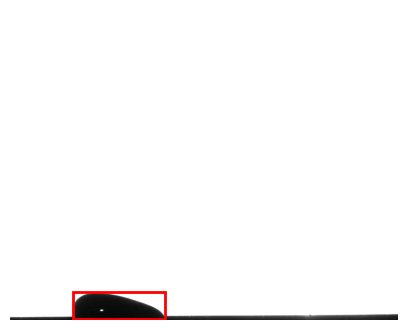

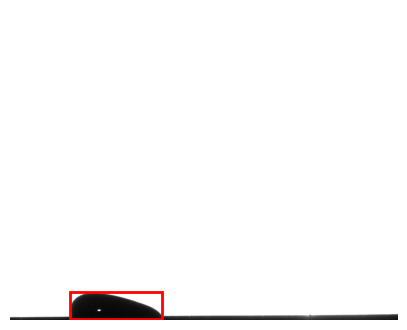

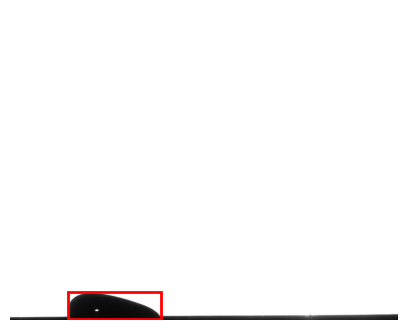

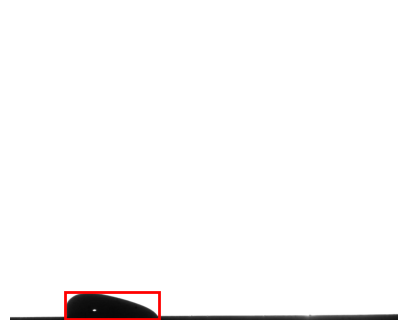

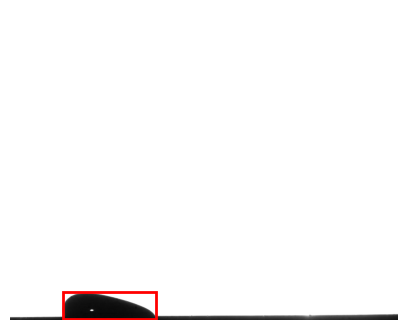

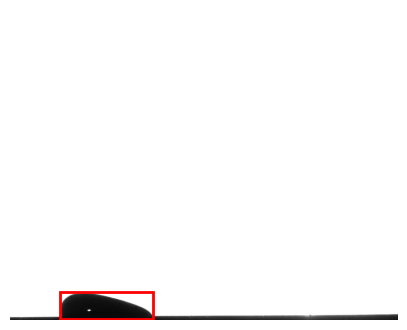

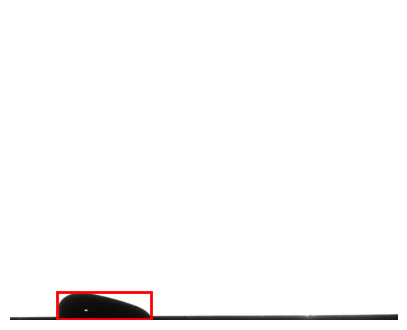

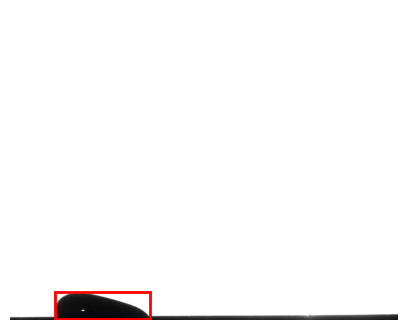

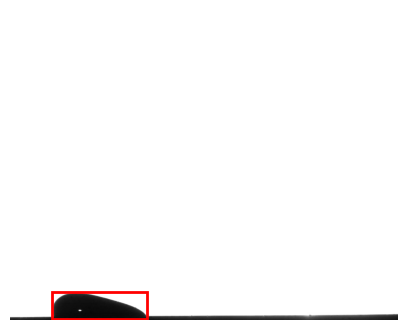

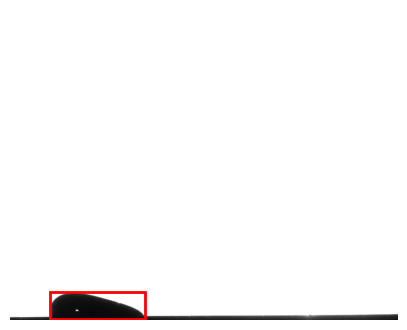

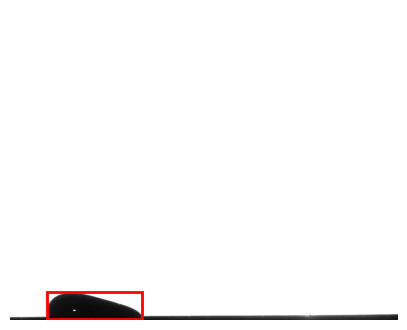

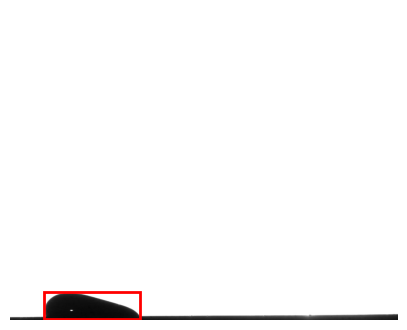

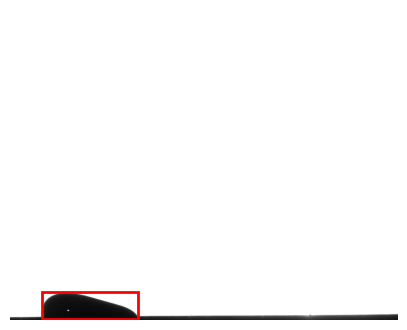

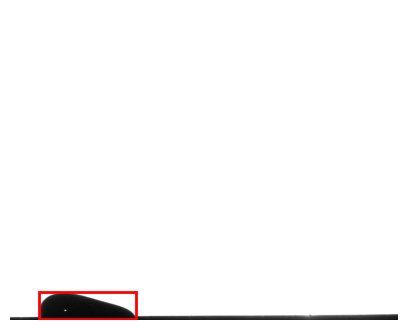

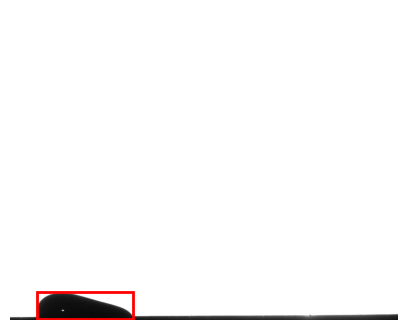

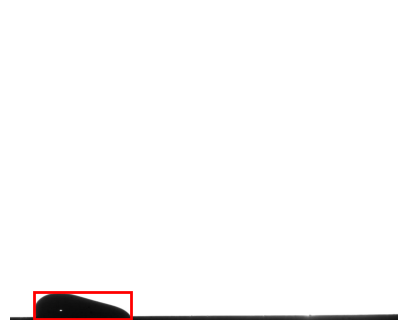

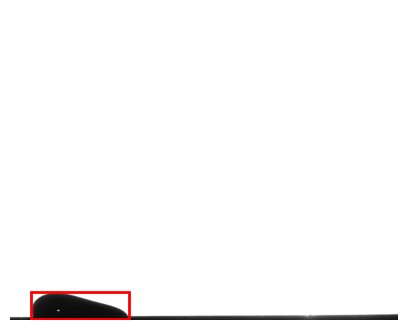

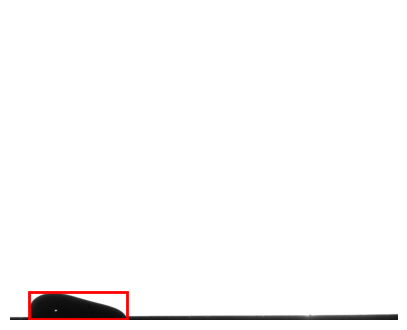

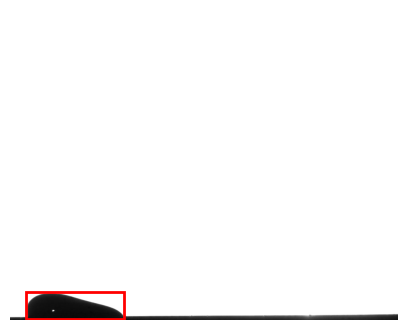

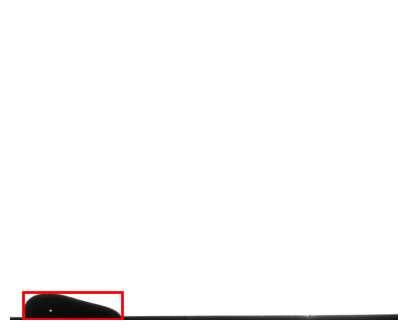

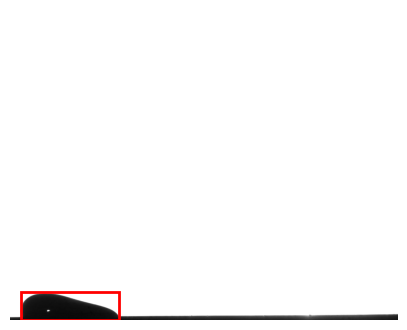

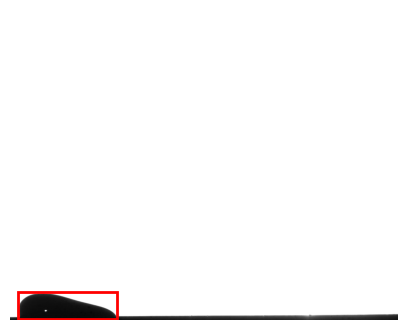

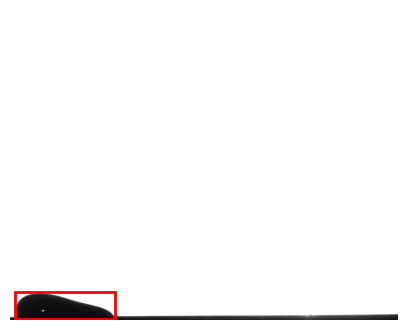

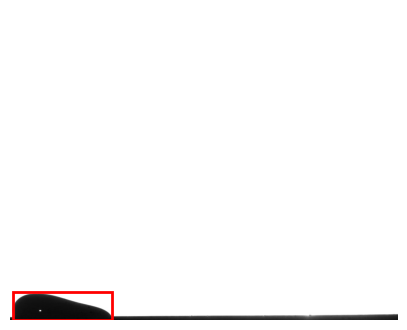

In [14]:
# Process images in batches of 10
batch_size = 10
for i in range(0, len(file_list), batch_size):
    batch_files = file_list[i:i+batch_size]
    batch_images = []

    for file in batch_files:
        image = cv2.imread(os.path.join(Base_Root, file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        batch_images.append(image)
    
    # Perform batch YOLO prediction
    results = yolo_m.predict(batch_images, verbose=False)

    for img, res in zip(batch_images, results):
        # Extract bounding box details (xywh format)
        if len(res.boxes.xywh) > 0:
            cc = np.array(res.boxes.xywh[:, :].cpu().numpy(), dtype=np.float32)[0]
            input_box = np.array([cc[0], cc[1], cc[2], cc[3]])
            
            # Get the coordinates of the bounding box
            x, y, w, h = input_box

            # Plot the image using Matplotlib
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.axis('off')

            # Draw the bounding box on the image
            rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=2, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

            # Show the plot
            plt.show()